# Imports

In [1]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import OzESI_CLAW

import re
from sklearn.mixture import GaussianMixture
import tqdm

import OzESI_CLAW
import OzESI
import OzESI_plot
import OzESI_compare

#version 2
import OzESI_v2

# Import the create_folder function from OzESI_utils
from OzESI_utils import create_folder

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
name_of_project = 'AMP'


# Separate OzON and OzOFF mzml files incase they weren't seprated before

In [2]:
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


# Database Location, Project Location, and CLAW Preparsing setup

In [3]:
#Set default values OzOFF
# data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
# Project = './Projects/'
# Project_Name = 'AMP'
# Project_Folder_data = Project + Project_Name + '/test3/'
# Project_results = Project + Project_Name + '/results/test3/'
# file_name_to_save = 'AMP'
# tolerance = 0.3
# remove_std = True
# save_data = True
#csv_data_folder = f'{Project_results}csv_data/'


# set the default values OzON

data_base_name_location = 'lipid_database/AMP_Database.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/test3/'
Project_results = Project + Project_Name + '/results/test3/'
file_name_to_save = 'AMP'
tolerance = 0.3
remove_std = True
save_data = True
csv_data_folder = f'{Project_results}csv_data/'


# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/test3/
Project_results: ./Projects/AMP/results/test3/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


In [4]:
# Define the base directory for saving plots
#OFF OFF OFF
#test 4 samples
# base_plot_directory = 'Projects/AMP/results/test3/plots/off/'
#AMP all samples 
# base_plot_directory = 'Projects/AMP/results/plots/off/'

# #ON ON ON
# base_plot_directory = 'Projects/AMP/results/test3/plots/on/'
# base_plot_directory = 'Projects/AMP/results/plots/on/'


# # Generate a filename for a given lipid name
# lipid_name = "Lipid/Name:Example"
# filename = OzESI.generate_filename(base_plot_directory, lipid_name)
# print(f"Generated filename: {filename}")





# #group columns of STANDARDS
# group_columns = ['Lipid']


####### save peak analysis directory
# Define the project results directory and the filename
#OFF OFF OFF
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_OFF.xlsx'

# project_results_directory = 'Projects/AMP/results/'
# save_df_name = 'AMP_OFF.xlsx'

# #ON ON ON
# # # Define the project results directory and the filename
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_ON.xlsx'

# project_results_directory = 'Projects/AMP/results/'
# save_df_name = 'AMP_ON.xlsx'

########## save  plots directory
# Define the directory where the plots should be saved
## OFF OFF OFF
# plots_directory = 'Projects/AMP/results/test3/plots/off/'
# plots_directory = 'Projects/AMP/results/plots/off/'

# ON ON ON
# plots_directory = 'Projects/AMP/results/test3/plots/on/'
# plots_directory = 'Projects/AMP/results/plots/on/'


############## OFF test3
# base_plot_directory = 'Projects/AMP/results/test3/plots/off/'
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_OFF.xlsx'
# plots_directory = 'Projects/AMP/results/test3/plots/off/'
################## ON test3
base_plot_directory = 'Projects/AMP/results/plots/on/'
project_results_directory = 'Projects/AMP/results/test3/'
save_df_name = 'test3_ON.xlsx'
plots_directory = 'Projects/AMP/results/test3/plots/on/'

# Ozone Compare

# Define the directory and file names
ozone_compare_directory = 'Projects/AMP/results/test3/'
file_name_off = 'test3_OFF.xlsx'
file_name_on = 'test3_ON.xlsx'

# csv paths

In [5]:
# Paths to the CSV files
mrm_csv_path = f'{csv_data_folder}df_MRM.csv'
oze_esi_csv_path = f'{csv_data_folder}df_OzESI.csv'

# Path to the output CSV file
output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser.csv"

# Path to the PeakAnalysis output CSV file
peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis.csv"

In [6]:
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD259', 'FAD257', 'FAD263', 'FAD249', 'FAD246', 'FAD245'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

# OzESI setup

In [7]:
# Ensure the base directory exists
OzESI.create_base_directory(base_plot_directory)
# Call the create_folder function
create_folder(csv_data_folder)

time_and_intensity_df, master_df, OzESI_time_df = OzESI_CLAW.create_analysis_dataframes()

Directory already exists at Projects/AMP/results/plots/on/
Directory already exists at ./Projects/AMP/results/test3/csv_data/


# CLAW with OzESI

In [8]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = OzESI_CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-cortex-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-dienc-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing all mzML files



# Double check DFs

In [9]:
#save both df as csv files in Project_results/csv_data using pandas
df_MRM.to_csv(f'{csv_data_folder}df_MRM.csv')
df_OzESI.to_csv(f'{csv_data_folder}df_OzESI.csv')
df_MRM.head(None)
df_OzESI


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,227.1,183.0,0.011583,41.500004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
1,NaN,227.1,183.0,0.024483,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
2,NaN,227.1,183.0,0.037383,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
3,NaN,227.1,183.0,0.050317,41.620003,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
4,NaN,227.1,183.0,0.063233,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
...,...,...,...,...,...,...,...
496308,NaN,533.5,183.0,29.949033,41.460003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
496309,NaN,533.5,183.0,29.961950,41.480003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
496310,NaN,533.5,183.0,29.974867,41.540005,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
496311,NaN,533.5,183.0,29.987800,41.600002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


# RawDataParser 
### Class for creating Match Group, extracting details from Sample ID, FAC and then parsing all the data and making a dataframe ready to be used to find peaks

In [10]:
import OzESI
import re

# Run RawDataParser
### 

In [21]:
parser = OzESI.RawDataParser(df_MRM, df_OzESI)


# Parse the data
parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns)

/home/iyer95/CLAW/CLAW/lipid_platform/OzESI.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()


# Plot Full Spectrum to see if data is good

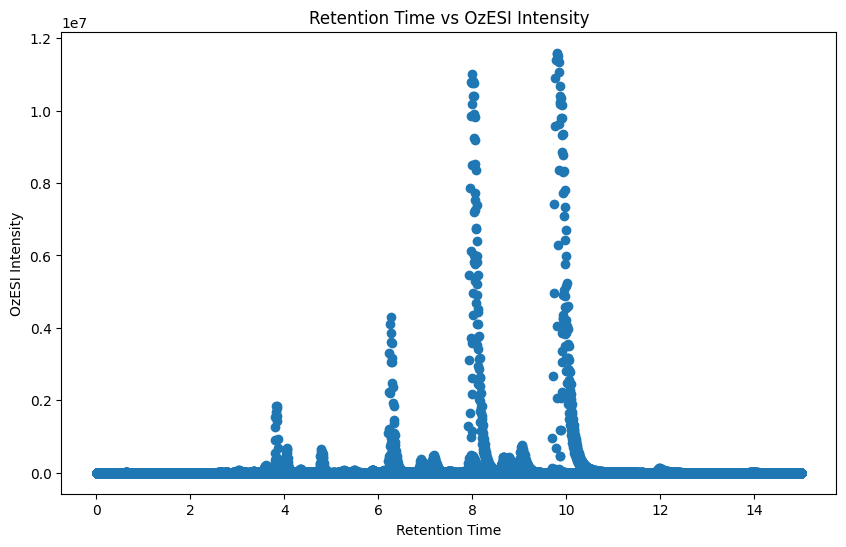

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,FAC,Group_Sample
0,227.1,183.0,0.011583,41.500004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,cereb,5xFAD,FAD257,m2,"[12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",16
1,227.1,183.0,0.024483,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,cereb,5xFAD,FAD257,m2,"[12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",16
2,227.1,183.0,0.037383,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,cereb,5xFAD,FAD257,m2,"[12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",16
3,227.1,183.0,0.050317,41.620003,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,cereb,5xFAD,FAD257,m2,"[12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",16
4,227.1,183.0,0.063233,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,cereb,5xFAD,FAD257,m2,"[12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,[24:1],199
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,[24:1],199
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,[24:1],199
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,[24:1],199


In [22]:
# Plot the full spectrum
parser.plot_full_spectrum(parsed_data)
parsed_data

RawDataParser complete, output saved to ./Projects/AMP/results/test3/csv_data/AMP_RawDataParser.csv


# PeakAnalysis Class
### find peaks, RT and peak area 
### input df from RawDataParser and output is df

In [23]:

peak_analysis = OzESI.PeakAnalysis(parsed_data)
peaks_df = peak_analysis.find_lipid_peaks(use_match_group=False, height=50000, width=2)
peaks_df


,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,1.757781e+05,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"[8:0, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.757781e+05,8.790978e+04,4.665065,8.200163e+05
1,"20:3 (8Z,11Z,14Z)n-6,n-9,n-12 / 12:1n-4 / 13:1...",3.821233,1.848861e+06,36,120,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,325.2,183.0,"[20:3, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.848861e+06,9.244511e+05,4.616779,8.535781e+06
2,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",3.032683,6.122725e+04,44,0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3,183.0,"[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",cereb,5xFAD,FAD257,m2,6.122725e+04,3.070032e+04,5.623372,3.443036e+05
3,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",4.053400,6.419501e+05,44,0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3,183.0,"[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",cereb,5xFAD,FAD257,m2,6.419501e+05,3.209958e+05,4.649299,2.984618e+06
4,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,4.337233,1.023703e+05,52,4,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,353.3,183.0,"[11:0, 15:1, 17:1]",cereb,5xFAD,FAD257,m2,1.023703e+05,5.120586e+04,5.045322,5.164913e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,17:0 / 19:1n-3 / 20:1n-4,8.803583,1.221649e+05,135,47,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,437.4,183.0,"[17:0, 19:1, 20:1]",dienc,5xFAD,FAD257,m2,1.221649e+05,7.005111e+04,10.046928,1.227382e+06
78,17:0 / 19:1n-3 / 20:1n-4,9.087833,1.420106e+05,135,47,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,437.4,183.0,"[17:0, 19:1, 20:1]",dienc,5xFAD,FAD257,m2,1.420106e+05,7.102600e+04,8.767824,1.245124e+06
79,18:1,8.660633,3.175716e+05,151,59,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,449.4,183.0,[18:1],dienc,5xFAD,FAD257,m2,3.175716e+05,1.588066e+05,9.159816,2.908897e+06
80,18:0 / 20:1n-3 / 21:1 n-4,9.939550,4.287062e+06,155,55,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,451.4,183.0,"[18:0, 20:1, 21:1]",dienc,5xFAD,FAD257,m2,4.287062e+06,2.143645e+06,11.015011,4.722204e+07


In [25]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,1.757781e+05,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"[8:0, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.757781e+05,8.790978e+04,4.665065,8.200163e+05
1,"20:3 (8Z,11Z,14Z)n-6,n-9,n-12 / 12:1n-4 / 13:1...",3.821233,1.848861e+06,36,120,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,325.2,183.0,"[20:3, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.848861e+06,9.244511e+05,4.616779,8.535781e+06
2,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",3.032683,6.122725e+04,44,0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3,183.0,"[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",cereb,5xFAD,FAD257,m2,6.122725e+04,3.070032e+04,5.623372,3.443036e+05
3,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",4.053400,6.419501e+05,44,0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3,183.0,"[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",cereb,5xFAD,FAD257,m2,6.419501e+05,3.209958e+05,4.649299,2.984618e+06
4,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,4.337233,1.023703e+05,52,4,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,353.3,183.0,"[11:0, 15:1, 17:1]",cereb,5xFAD,FAD257,m2,1.023703e+05,5.120586e+04,5.045322,5.164913e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,17:0 / 19:1n-3 / 20:1n-4,8.803583,1.221649e+05,135,47,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,437.4,183.0,"[17:0, 19:1, 20:1]",dienc,5xFAD,FAD257,m2,1.221649e+05,7.005111e+04,10.046928,1.227382e+06
78,17:0 / 19:1n-3 / 20:1n-4,9.087833,1.420106e+05,135,47,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,437.4,183.0,"[17:0, 19:1, 20:1]",dienc,5xFAD,FAD257,m2,1.420106e+05,7.102600e+04,8.767824,1.245124e+06
79,18:1,8.660633,3.175716e+05,151,59,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,449.4,183.0,[18:1],dienc,5xFAD,FAD257,m2,3.175716e+05,1.588066e+05,9.159816,2.908897e+06
80,18:0 / 20:1n-3 / 21:1 n-4,9.939550,4.287062e+06,155,55,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,451.4,183.0,"[18:0, 20:1, 21:1]",dienc,5xFAD,FAD257,m2,4.287062e+06,2.143645e+06,11.015011,4.722204e+07


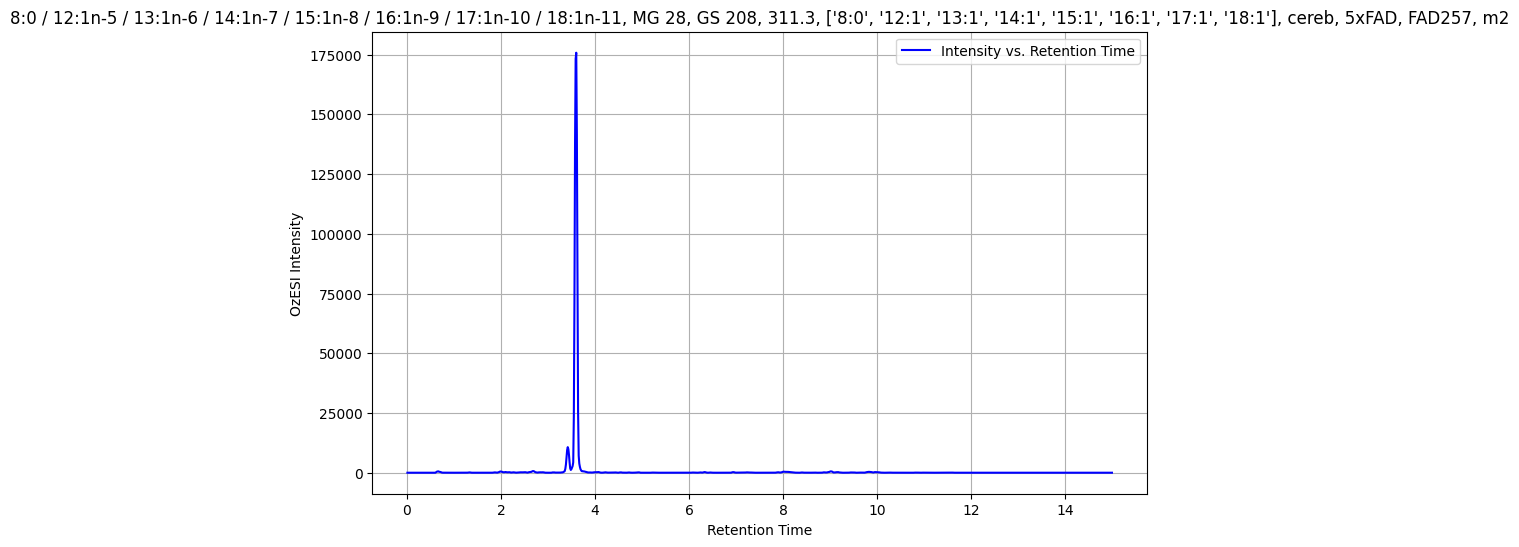

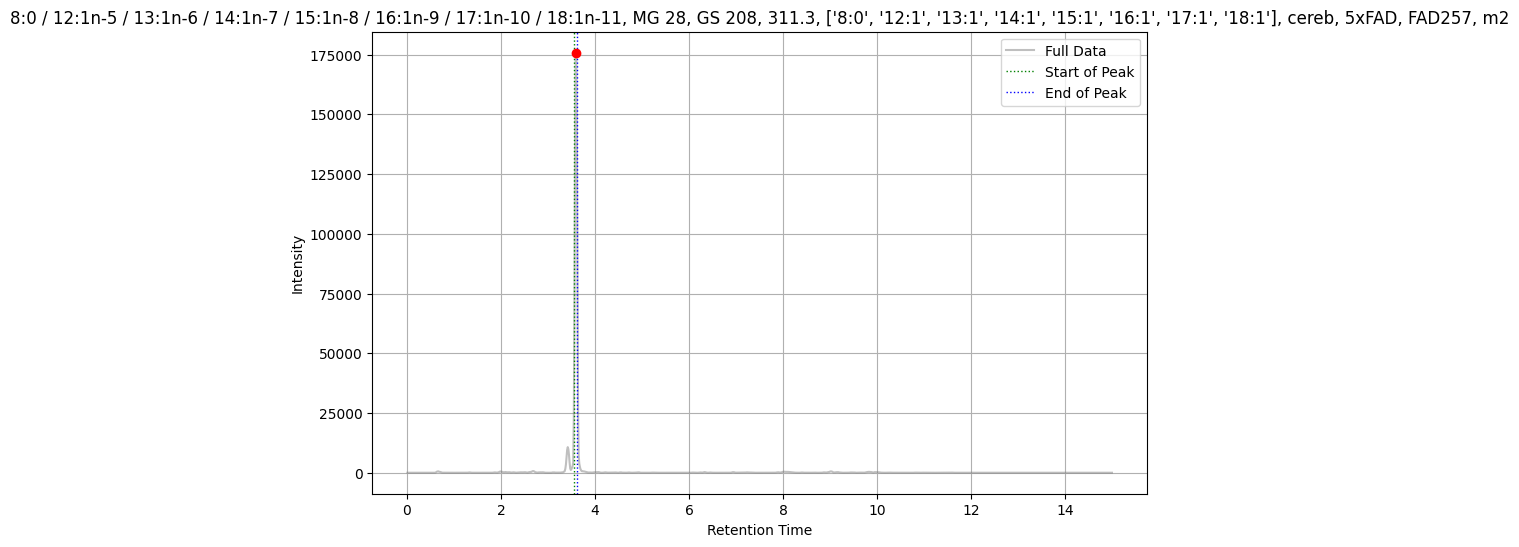

In [28]:
peak_analysis.plot_data_and_peaks(28, group_type='Match_Group')

# Plot specific match group or group sample 
#### Used to check peak data

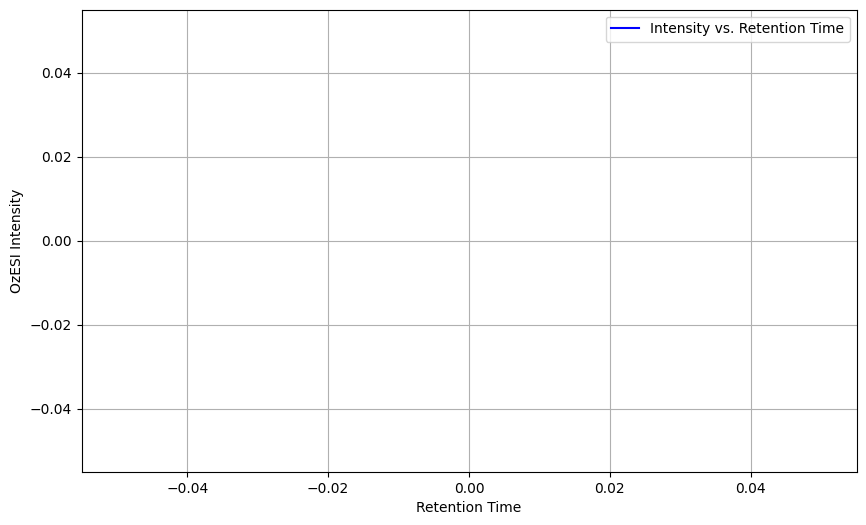

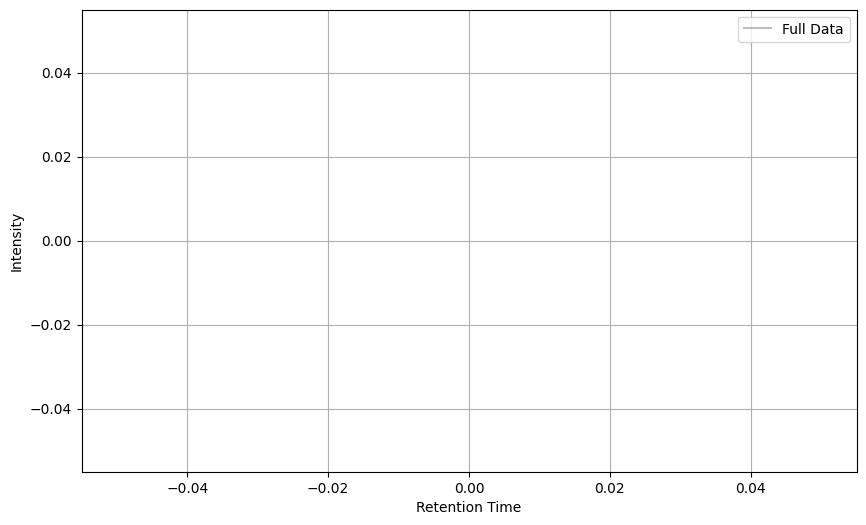

In [24]:
peak_analysis.plot_data_and_peaks(1709, group_type='Match_Group')


In [44]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,1.757781e+05,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"[8:0, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.757781e+05,8.790977e+04,4.665065,8.200164e+05
1,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,1.757781e+05,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"[8:0, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.757781e+05,8.790977e+04,4.665065,8.200164e+05
2,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,1.757781e+05,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"[8:0, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.757781e+05,8.790978e+04,4.665065,8.200163e+05
3,"20:3 (8Z,11Z,14Z)n-6,n-9,n-12 / 12:1n-4 / 13:1...",3.821233,1.848861e+06,36,120,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,325.2,183.0,"[20:3, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.848861e+06,9.244511e+05,4.616779,8.535782e+06
4,"20:3 (8Z,11Z,14Z)n-6,n-9,n-12 / 12:1n-4 / 13:1...",3.821233,1.848861e+06,36,120,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,325.2,183.0,"[20:3, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1]",cereb,5xFAD,FAD257,m2,1.848861e+06,9.244511e+05,4.616779,8.535782e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,18:0 / 20:1n-3 / 21:1 n-4,9.939550,4.287062e+06,155,55,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,451.4,183.0,"[18:0, 20:1, 21:1]",dienc,5xFAD,FAD257,m2,4.287062e+06,2.143552e+06,11.015443,4.722389e+07
242,18:0 / 20:1n-3 / 21:1 n-4,9.939550,4.287062e+06,155,55,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,451.4,183.0,"[18:0, 20:1, 21:1]",dienc,5xFAD,FAD257,m2,4.287062e+06,2.143645e+06,11.015011,4.722204e+07
243,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,6.803460e+04,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"[22:6, 20:5]",dienc,5xFAD,FAD257,m2,6.803460e+04,3.403804e+04,5.831346,3.967333e+05
244,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,6.803460e+04,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"[22:6, 20:5]",dienc,5xFAD,FAD257,m2,6.803460e+04,3.403804e+04,5.831346,3.967333e+05


# Save output of PeakAnalysis df to excel to be used for Ozone Compare Later

In [45]:
# # Define the project results directory and the filename
# project_results_directory = 'Projects/AMP/results/fame_mix/'
# save_df_name = 'FAME_OzOFF.xlsx'

# Call the function to save the DataFrame
OzESI.save_for_ozone_compare(peaks_df, project_results_directory, save_df_name)

Directory already exists at Projects/AMP/results/test3/
peaks_df saved to excel in results folder Projects/AMP/results/test3/test3_ON.xlsx


# OzoneCompare Class
### Input OzOFF and OzON df
### Match FAC and RT in OzON to those in OzOFF

In [46]:
# Import the OzoneCompare class from OzESI_compare.py
import OzESI_compare

# # Define the directory and file names
# directory = 'Projects/AMP/results/fame_mix/'
# file_name_on = 'FAME_OzON.xlsx'
# file_name_off = 'FAME_OzOFF.xlsx'

# Create an instance of the class
ozone_compare = OzESI_compare.OzoneCompare(ozone_compare_directory, file_name_on, file_name_off)

# Match dataframes
matched_df = ozone_compare.match_dataframes()

# Print matches for a specific match group
ozone_compare.print_fac_and_off_match(matched_df, 2)

# Filter and print DataFrame rows where FAC_OFF does not contain ':0'
filtered_df = ozone_compare.filter_contains_colon_zero(matched_df)
filtered_df


No entries found for Match Group 2.


,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,FAC_OFF,Retention_Time_OFF
288,16:1,7.047433,109495.406250,112,40,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,421.4,183,['16:1'],cereb,5xFAD,FAD257,m2,109495.406250,54768.373127,6.662254,729486.179958,16:1,7.047433
289,16:1,7.047433,109495.406250,112,40,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,421.4,183,['16:1'],cereb,5xFAD,FAD257,m2,109495.406250,54768.373127,6.662254,729486.179958,16:1,7.047433
290,16:1,7.047433,109495.406250,112,40,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,421.4,183,['16:1'],cereb,5xFAD,FAD257,m2,109495.406250,54768.373127,6.662254,729486.179958,16:1,7.073267
291,16:1,7.047433,109495.406250,112,40,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,421.4,183,['16:1'],cereb,5xFAD,FAD257,m2,109495.406250,54768.373127,6.662254,729486.179958,16:1,7.073267
292,16:1,7.047433,109495.406250,112,40,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,421.4,183,['16:1'],cereb,5xFAD,FAD257,m2,109495.406250,54768.373127,6.662254,729486.179958,16:1,7.073300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2534,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2535,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2536,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.869233


Directory already exists at Projects/AMP/results/test3/plots/on/


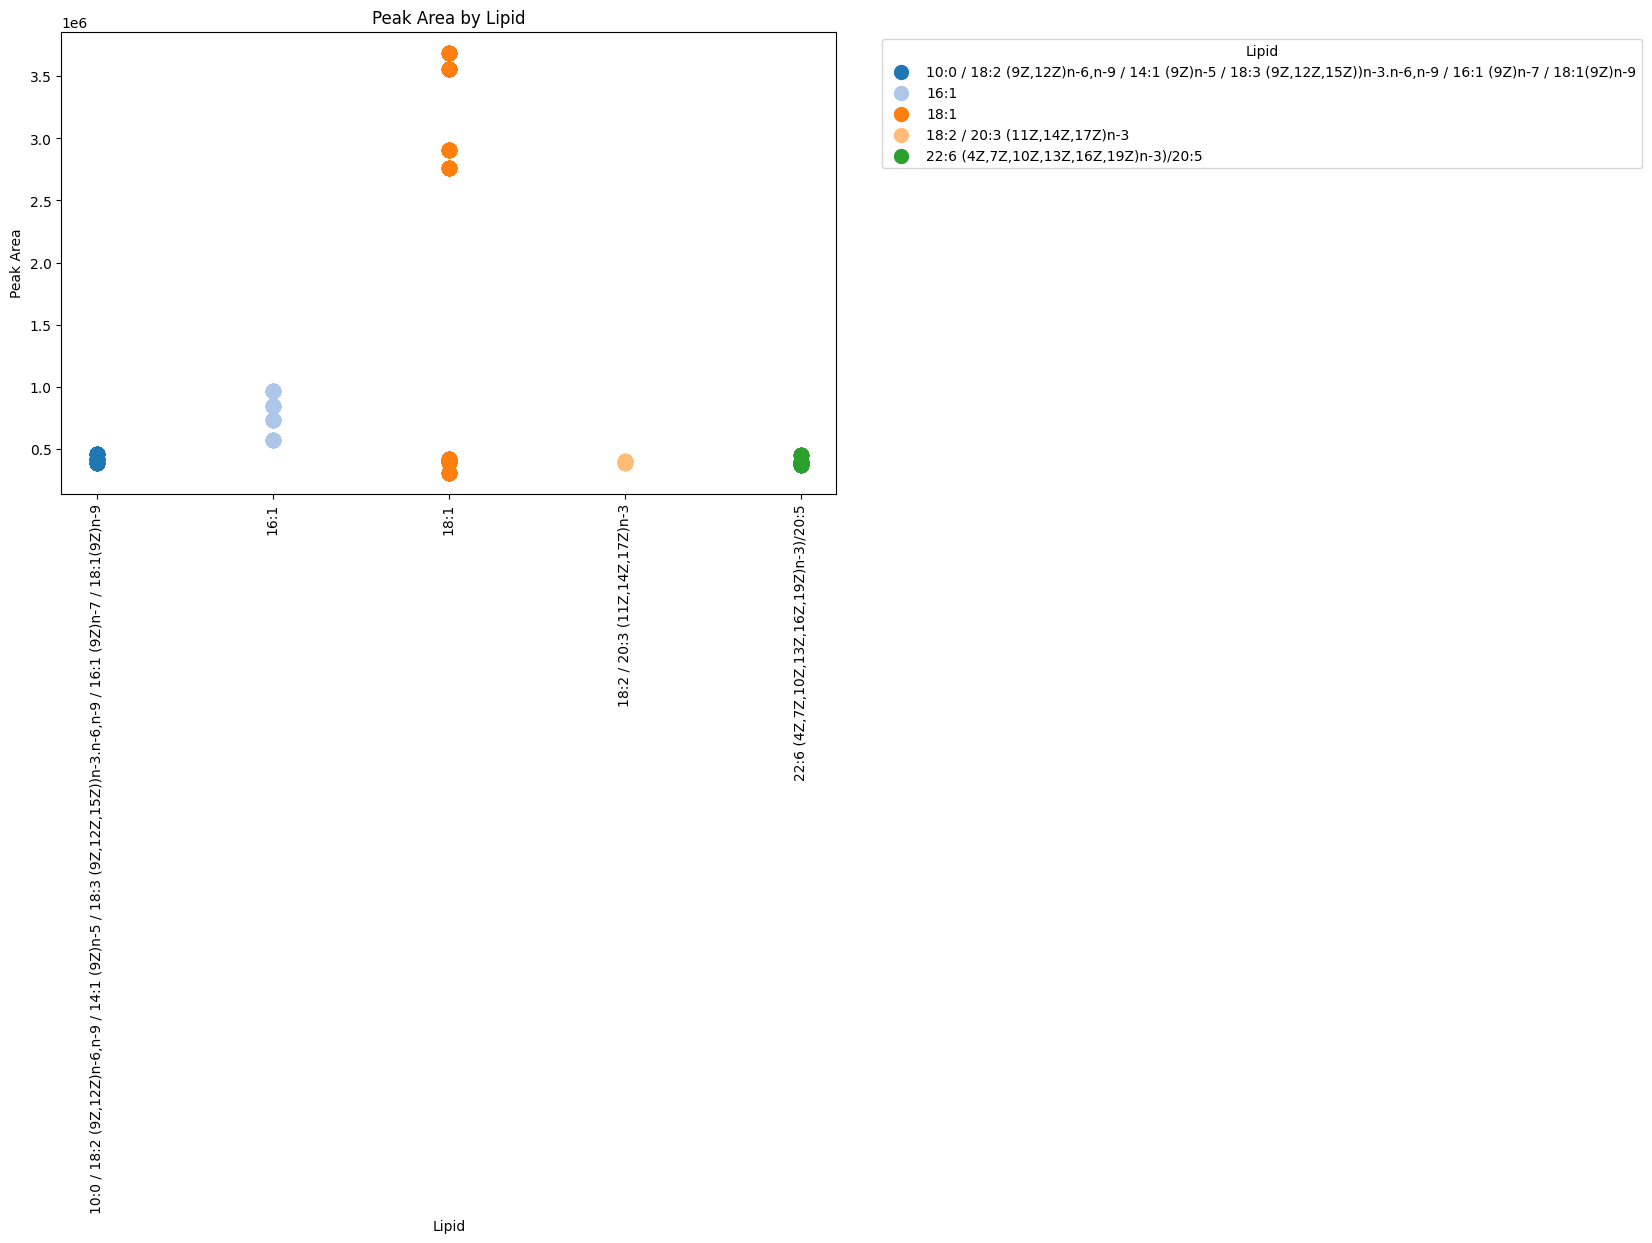

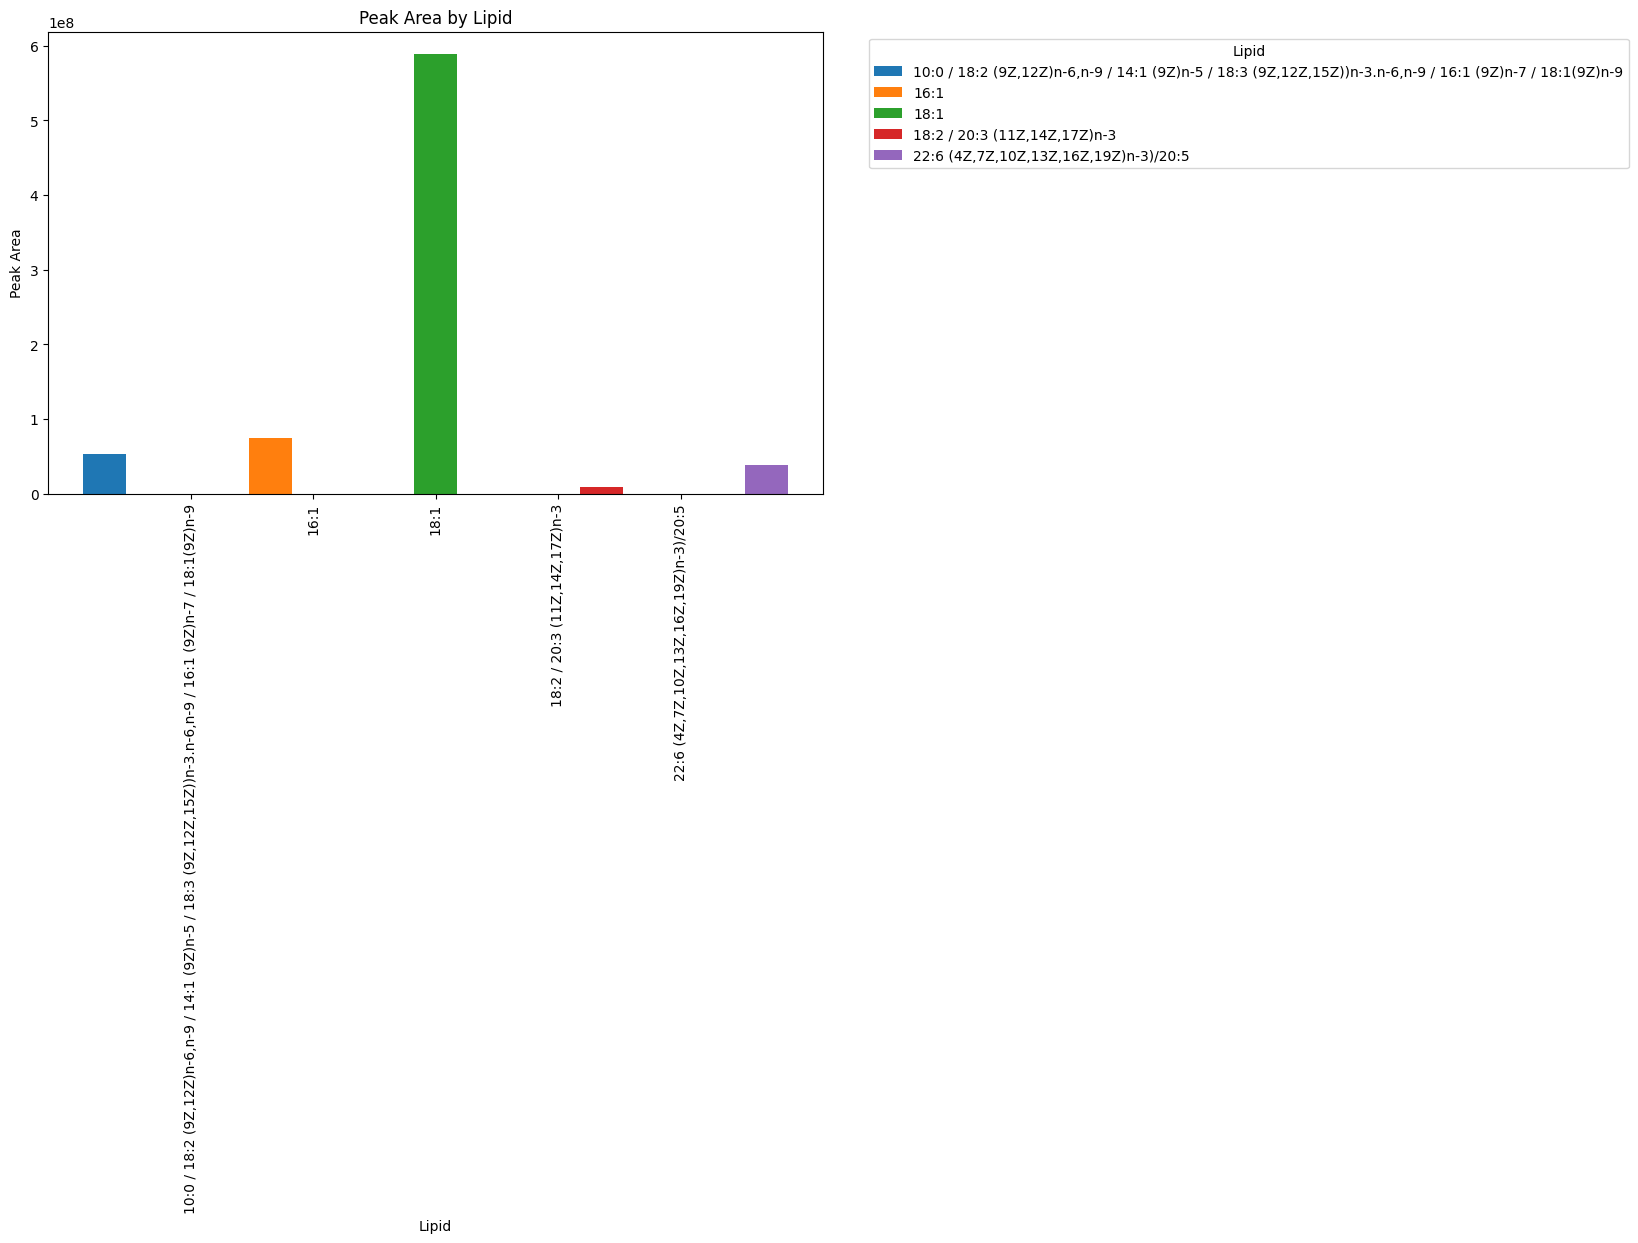

In [47]:
import OzESI_plot

# # Define the directory where the plots should be saved
# plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create an instance of the Plot class with the specified directory
plot_instance = OzESI_plot.Plot(dataframe=filtered_df, plot_directory=plots_directory)

# Call the scatter method to plot data
plot_instance.scatter()

# Call the plot_bar method to display bar charts
plot_instance.plot_bar()

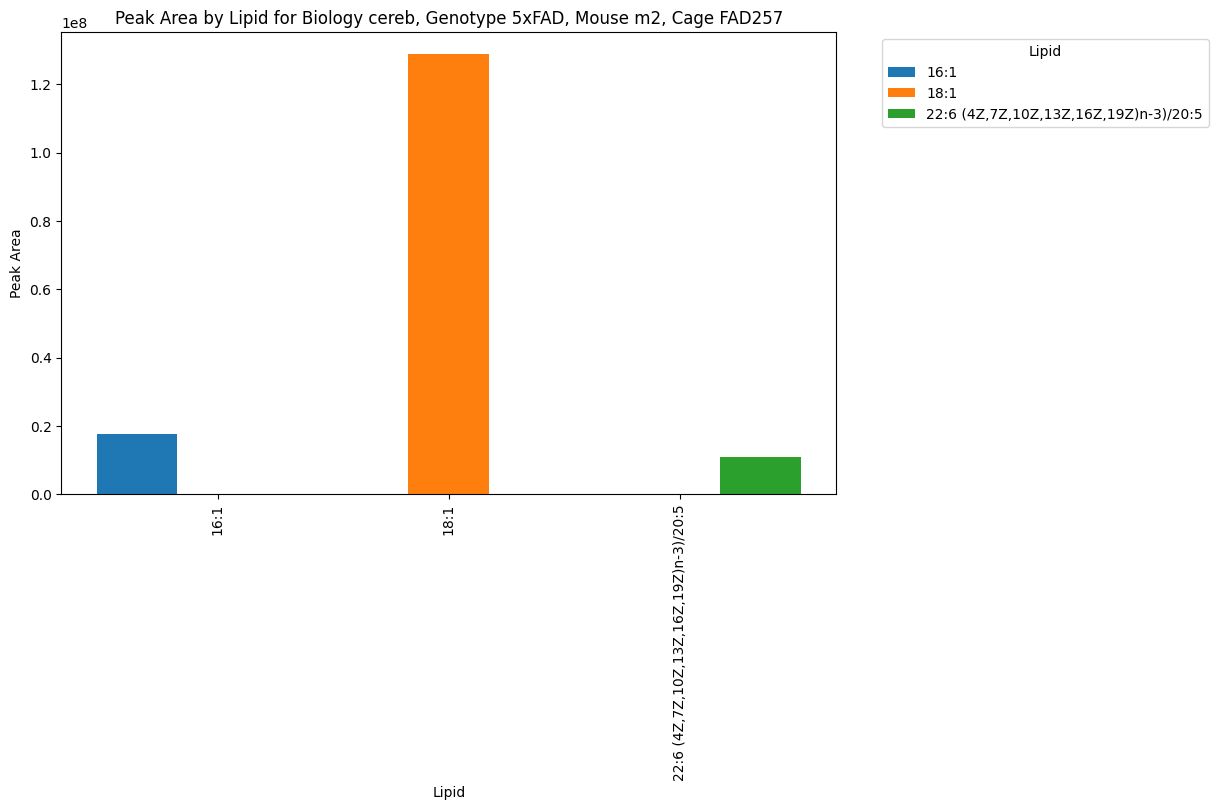

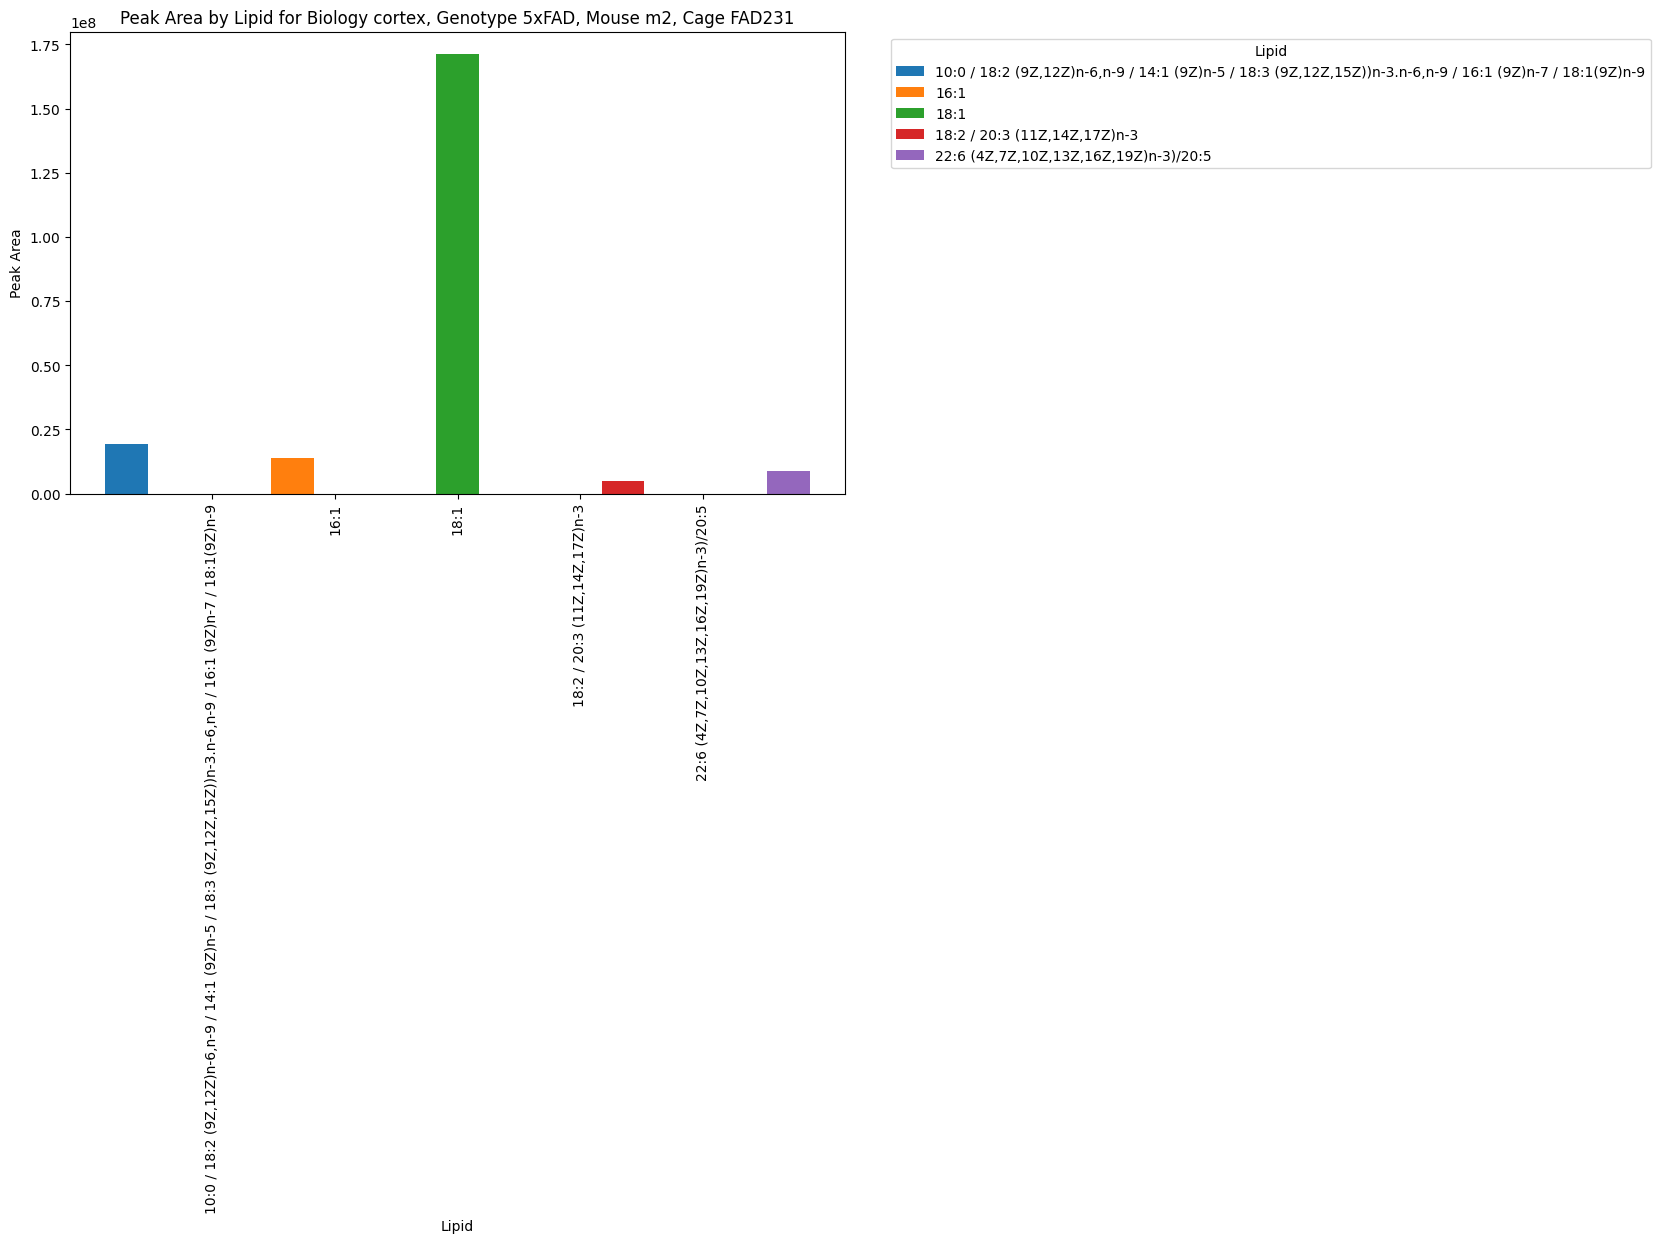

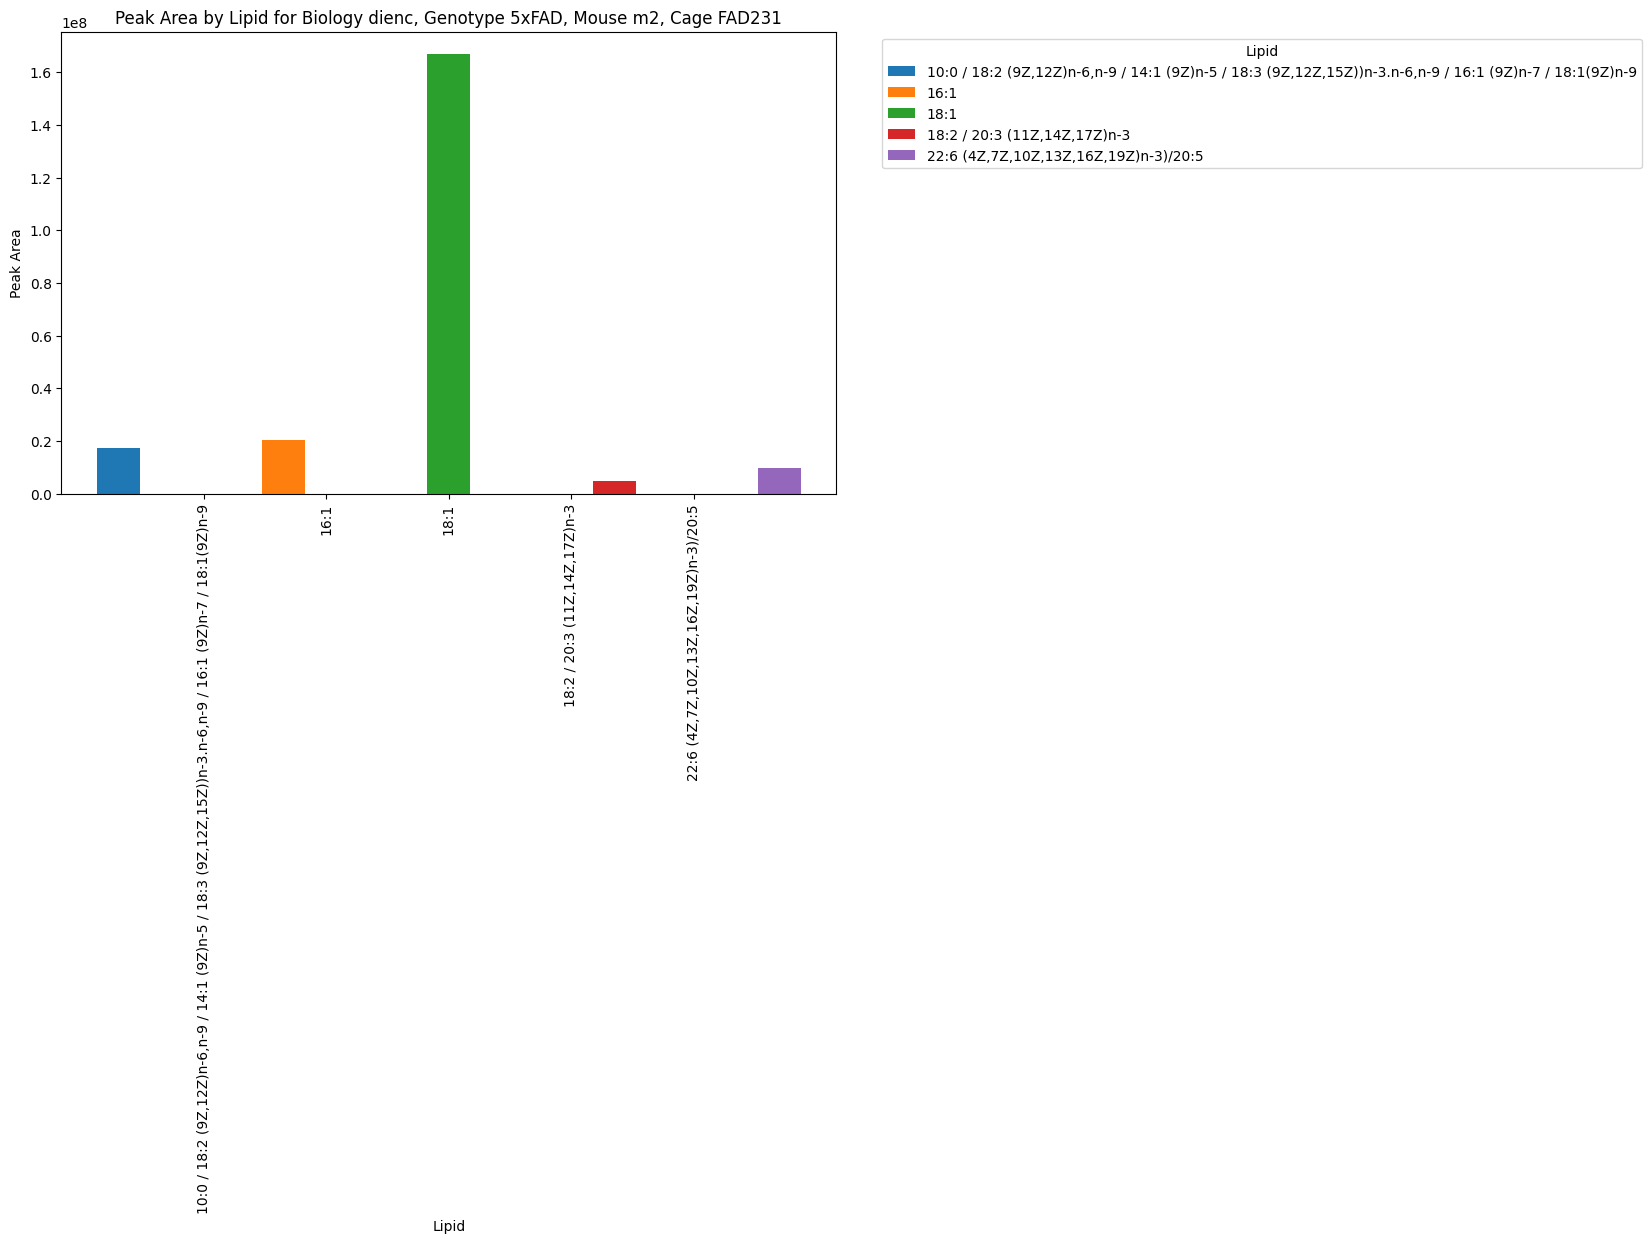

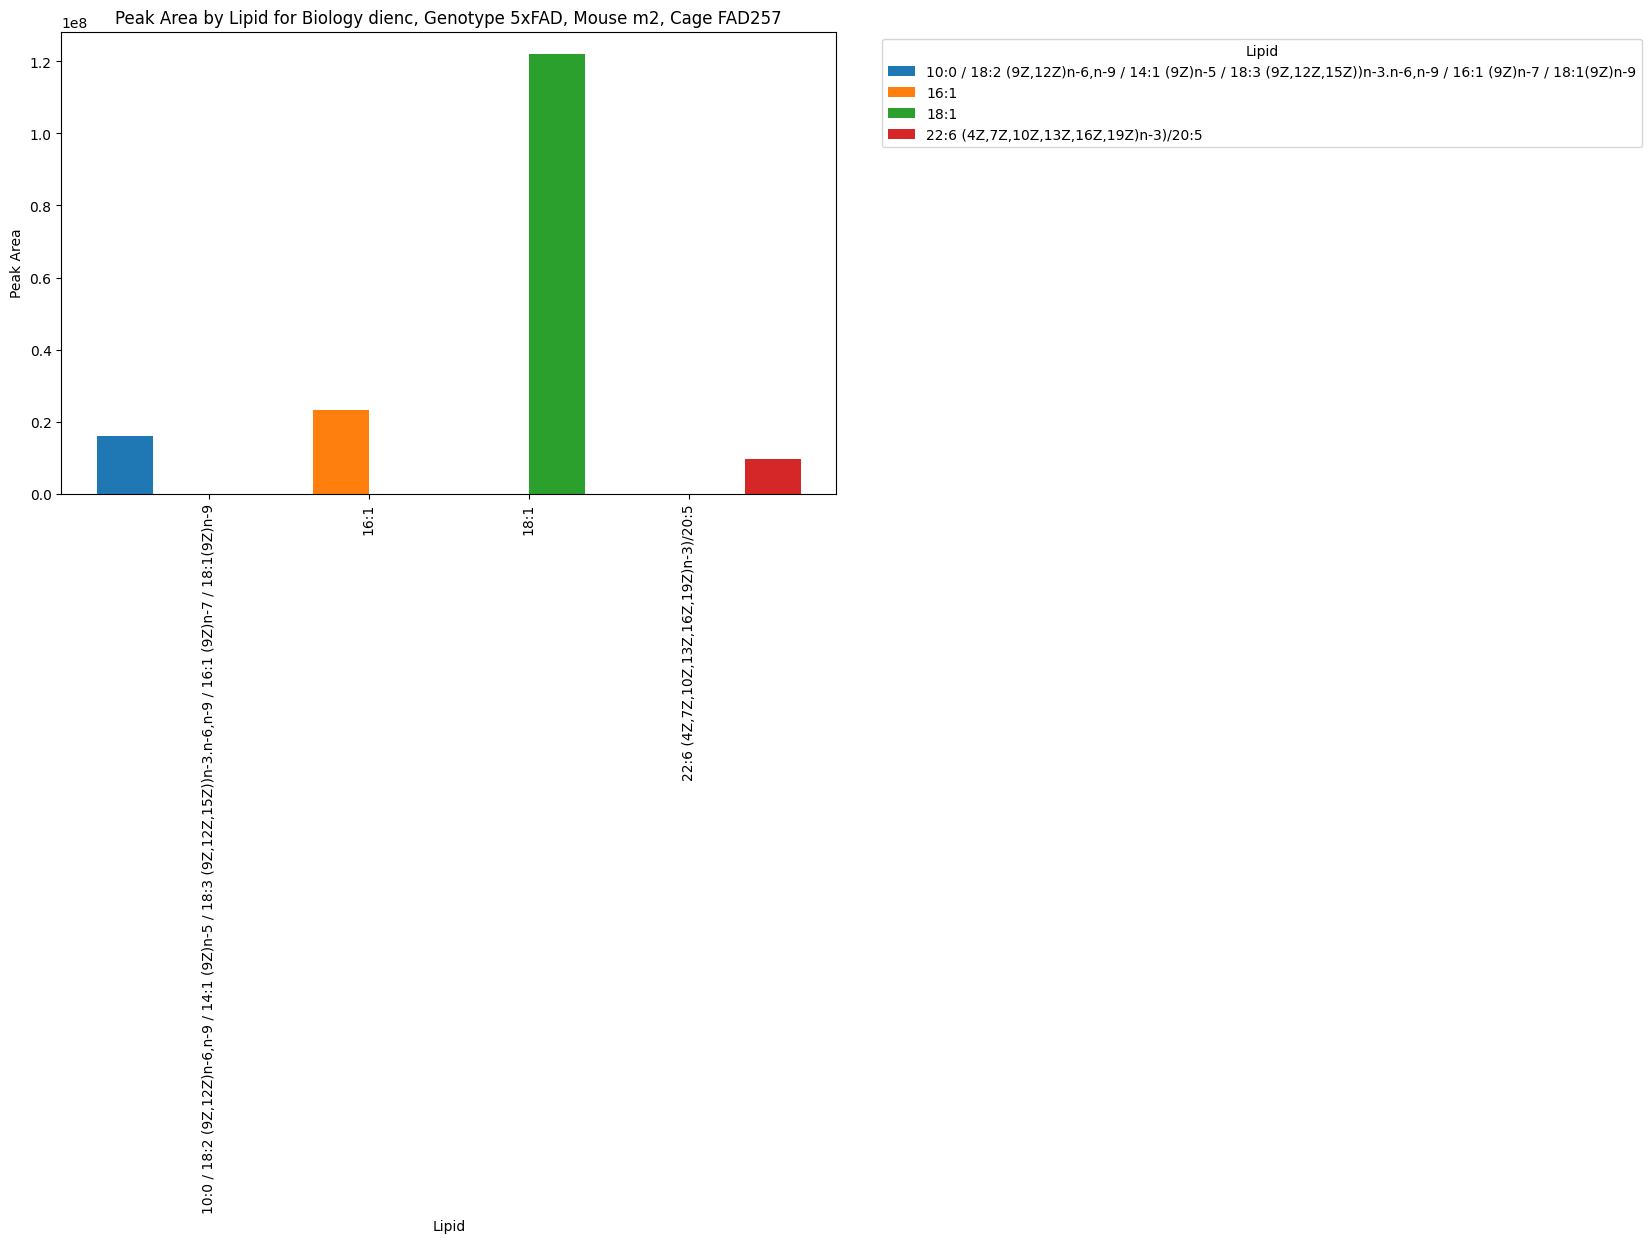

In [48]:


plot_instance.plot_bar_by_group_sample()

Directory already exists at Projects/AMP/results/test3/plots/on/


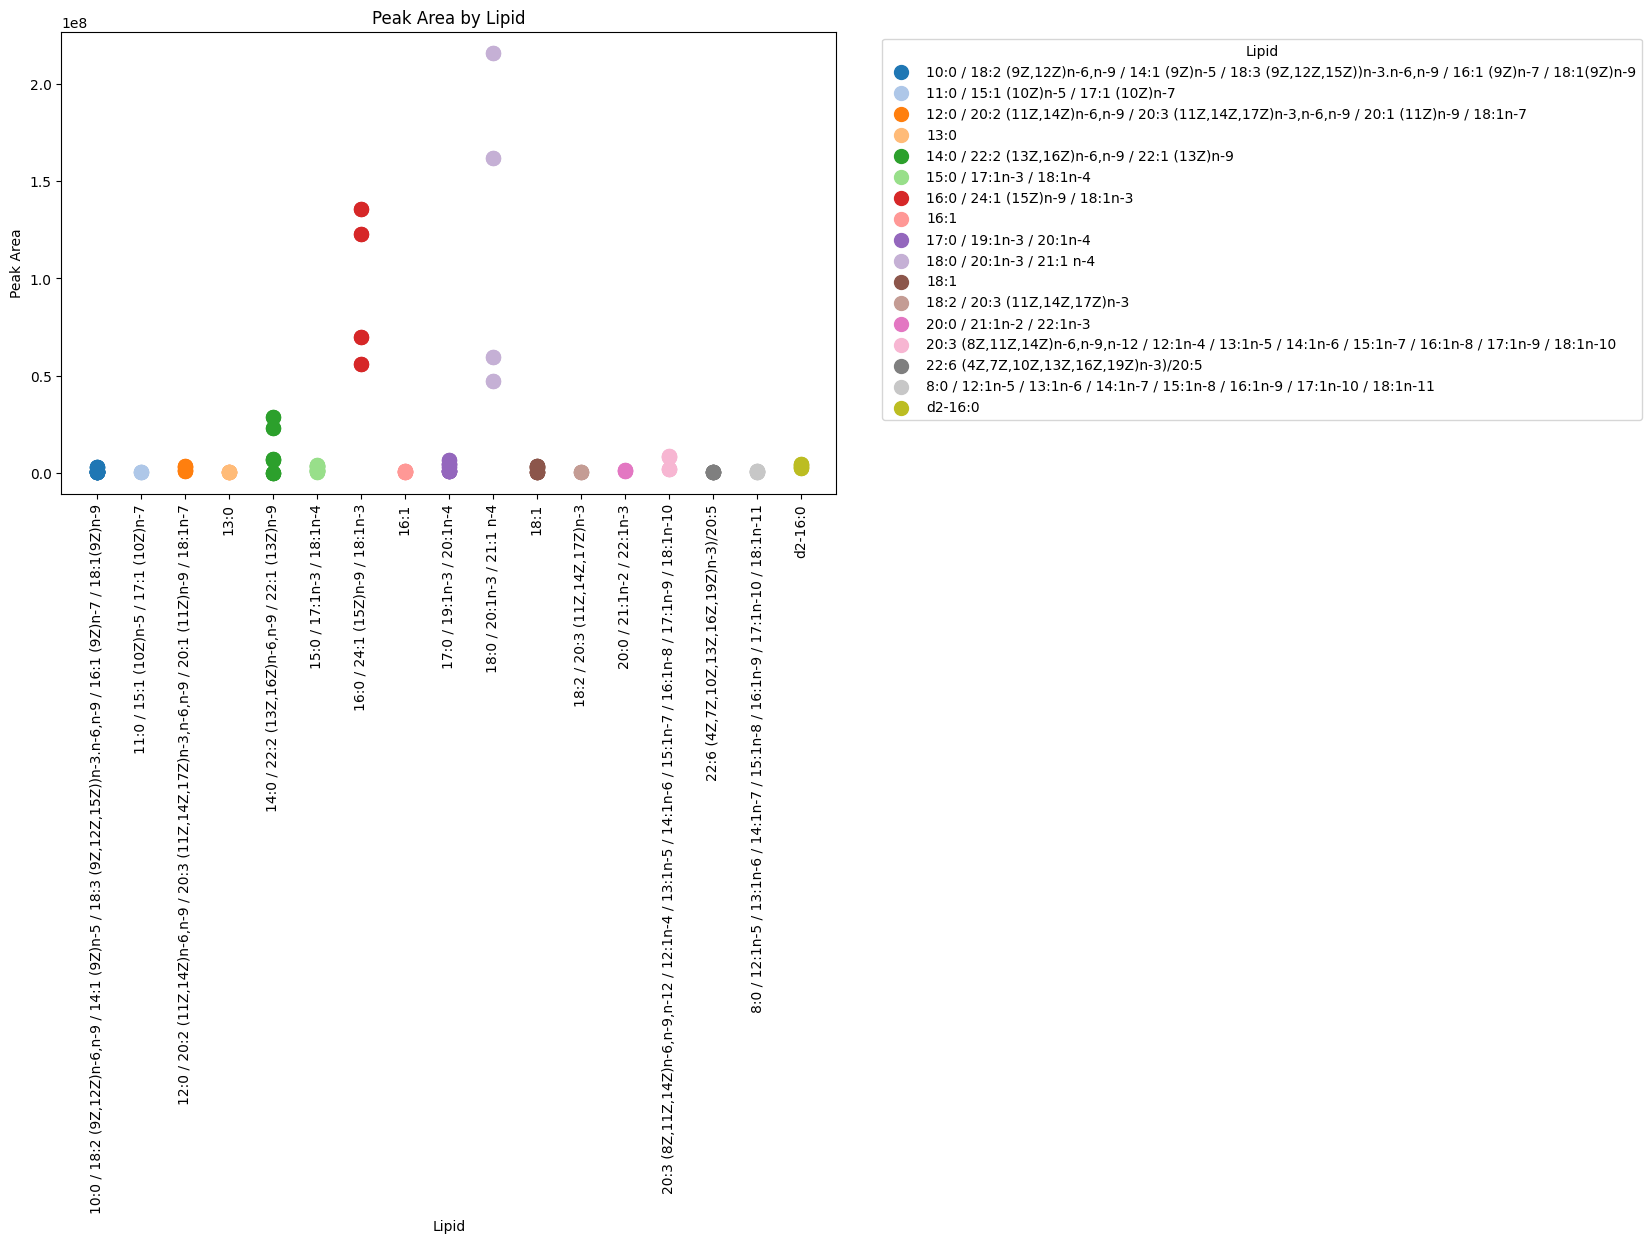

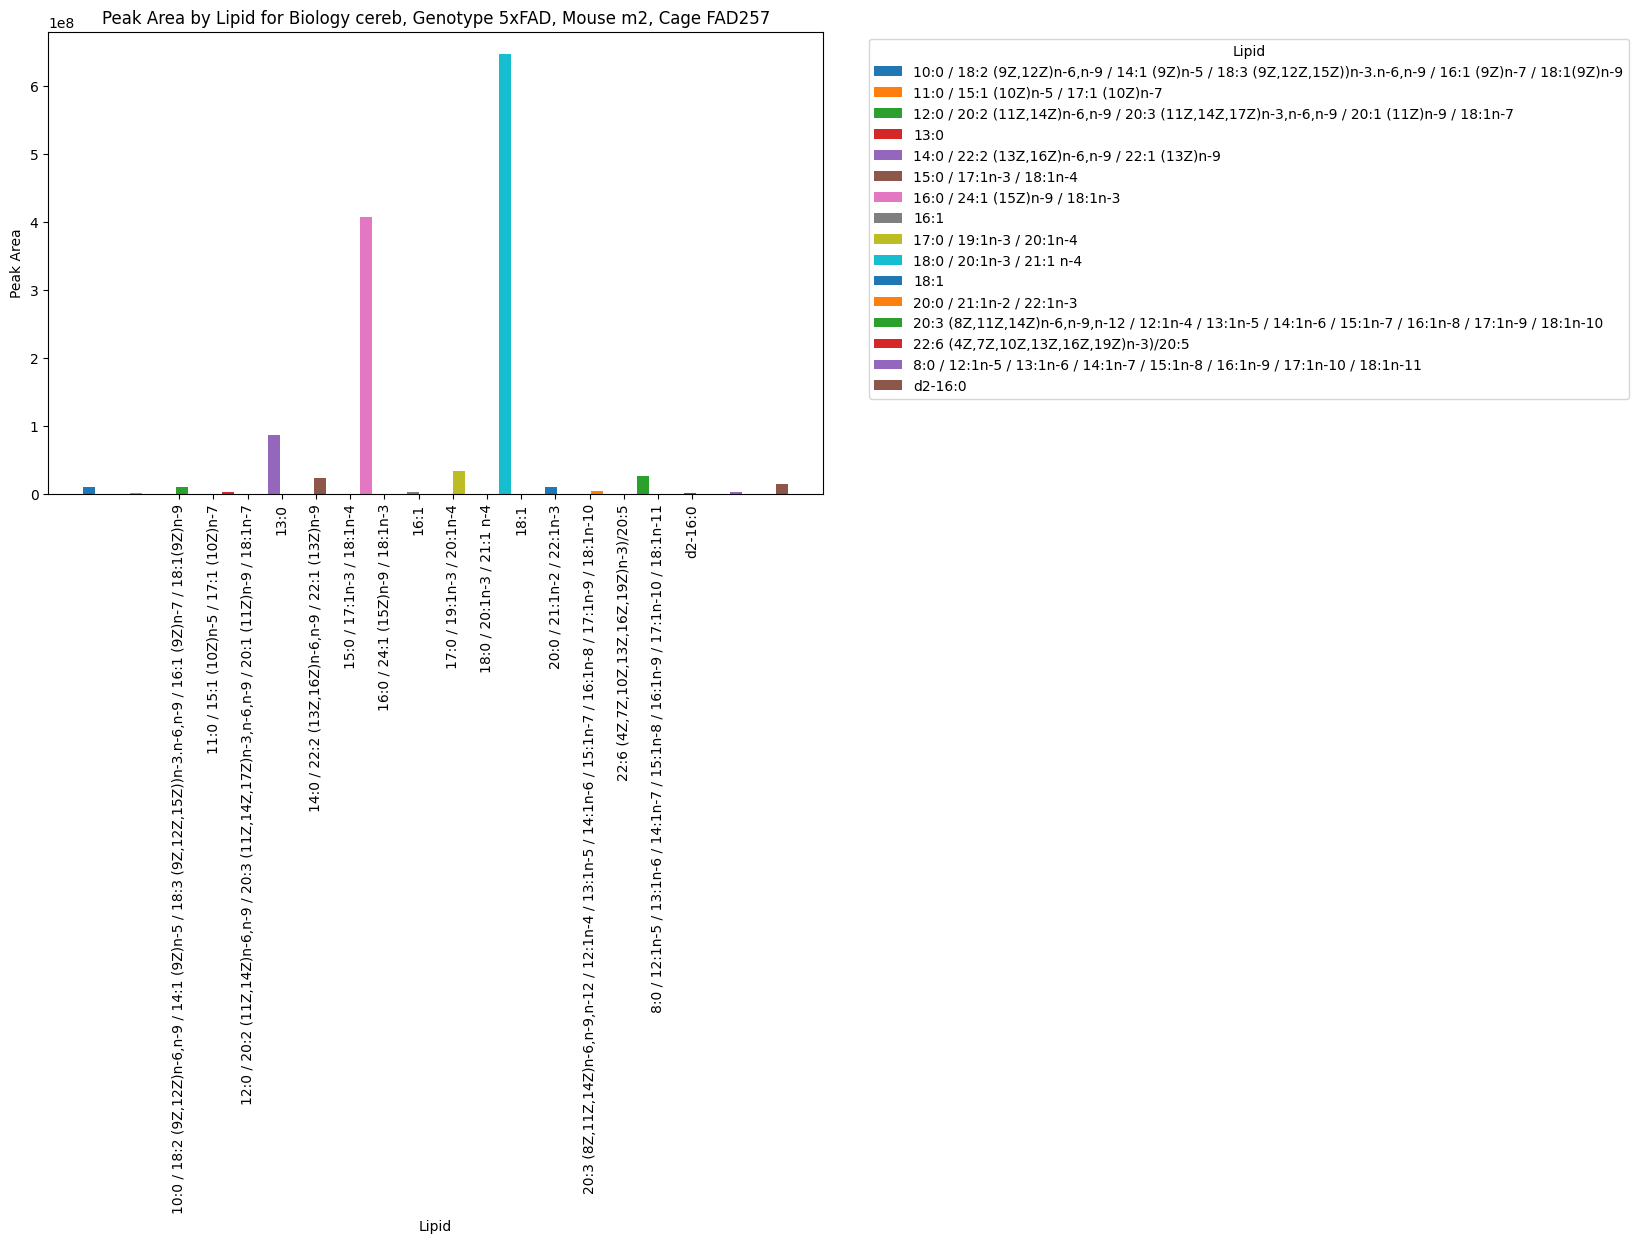

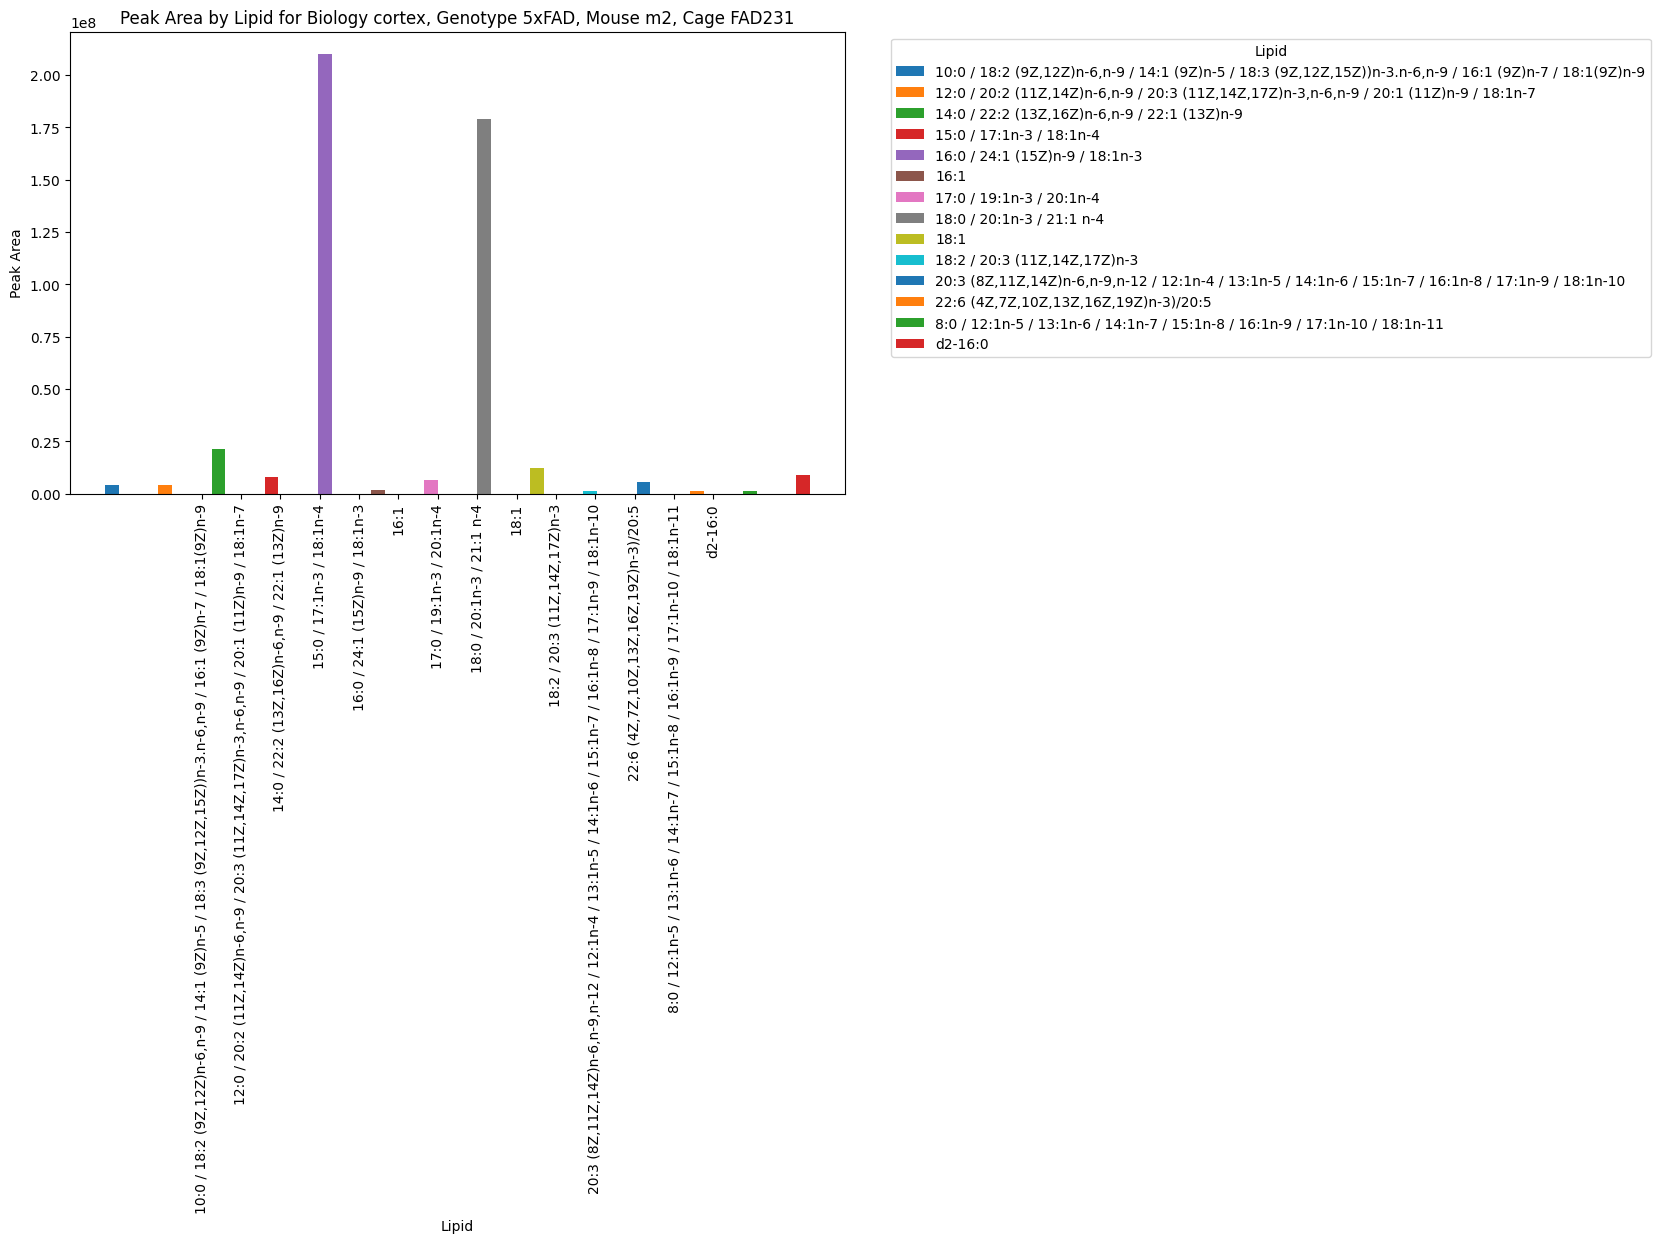

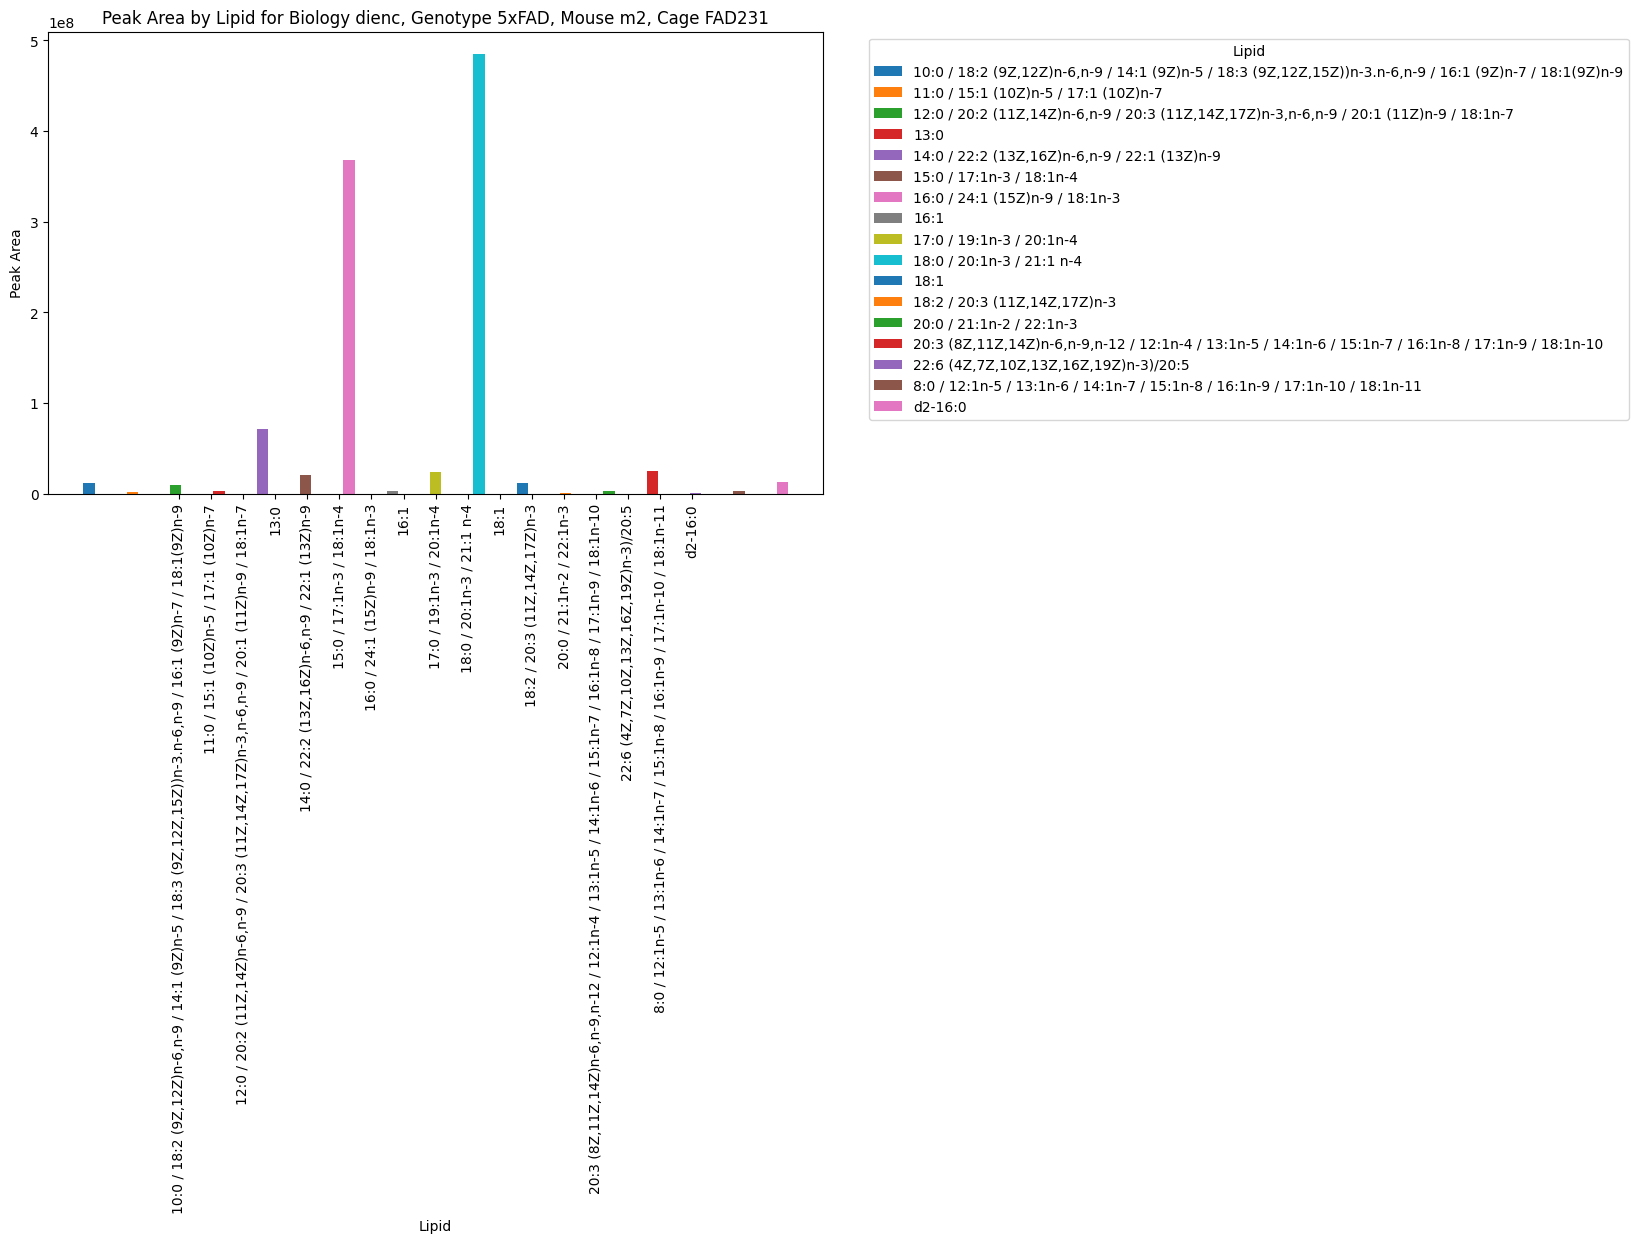

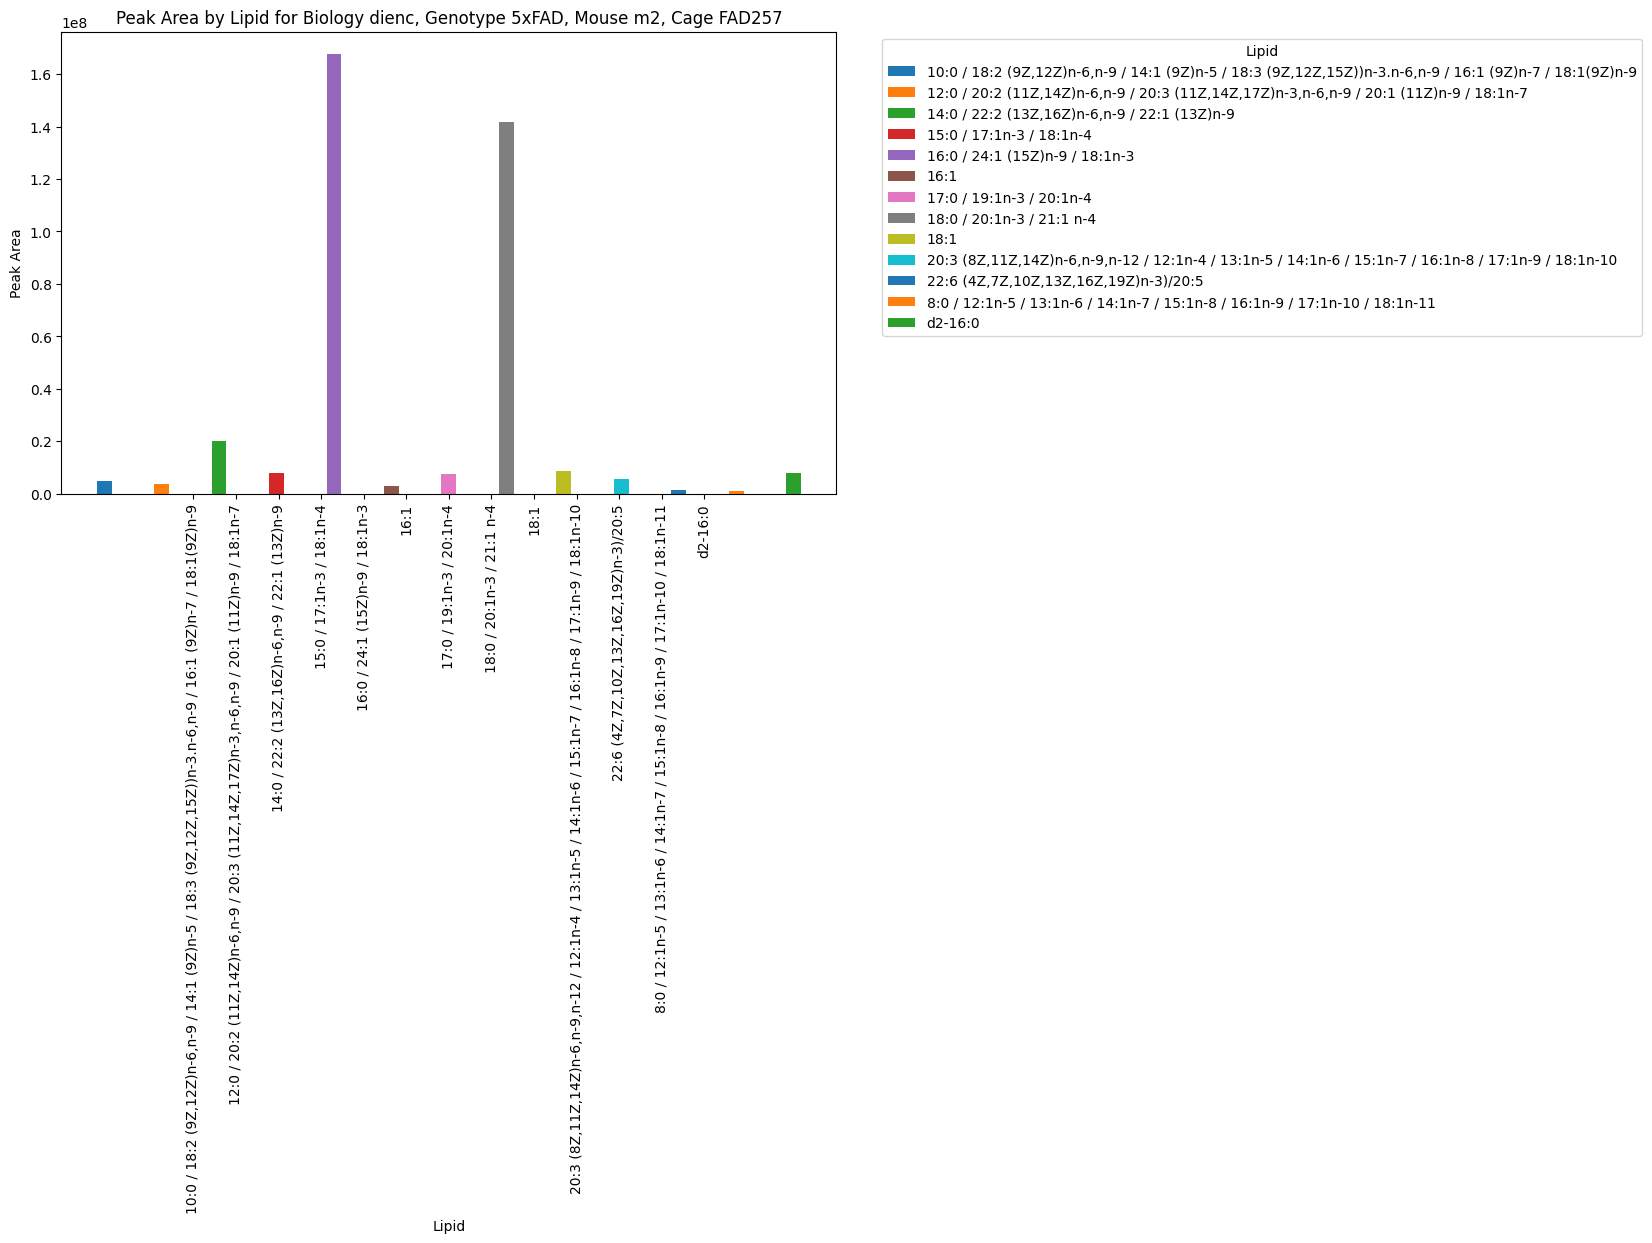

In [49]:
import OzESI_plot

# # Define the directory where the plots should be saved
# plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create an instance of the Plot class with the specified directory
plot_instance = OzESI_plot.Plot(dataframe=peaks_df, plot_directory=plots_directory)

# Call the scatter method to plot data
plot_instance.scatter()


plot_instance.plot_bar_by_group_sample()